## DETECTING MARINE HEATWAVE 

__What are marine heatwaves?__

 _Marine heatwaves are periods of extremely high temperatures in the ocean (above the 90th percentile).These events cause habitat destruction due to coral bleaching, seagrass destruction, and loss of kelp forests, affecting the fisheries sector adversely. An underwater survey showed that 85% of the corals in the Gulf of Mannar near the Tamil Nadu coast got bleached after the marine heatwave in May 2020. Though recent studies have reported their occurrence and impacts in the global oceans, they are least understood in the tropical Indian Ocean._

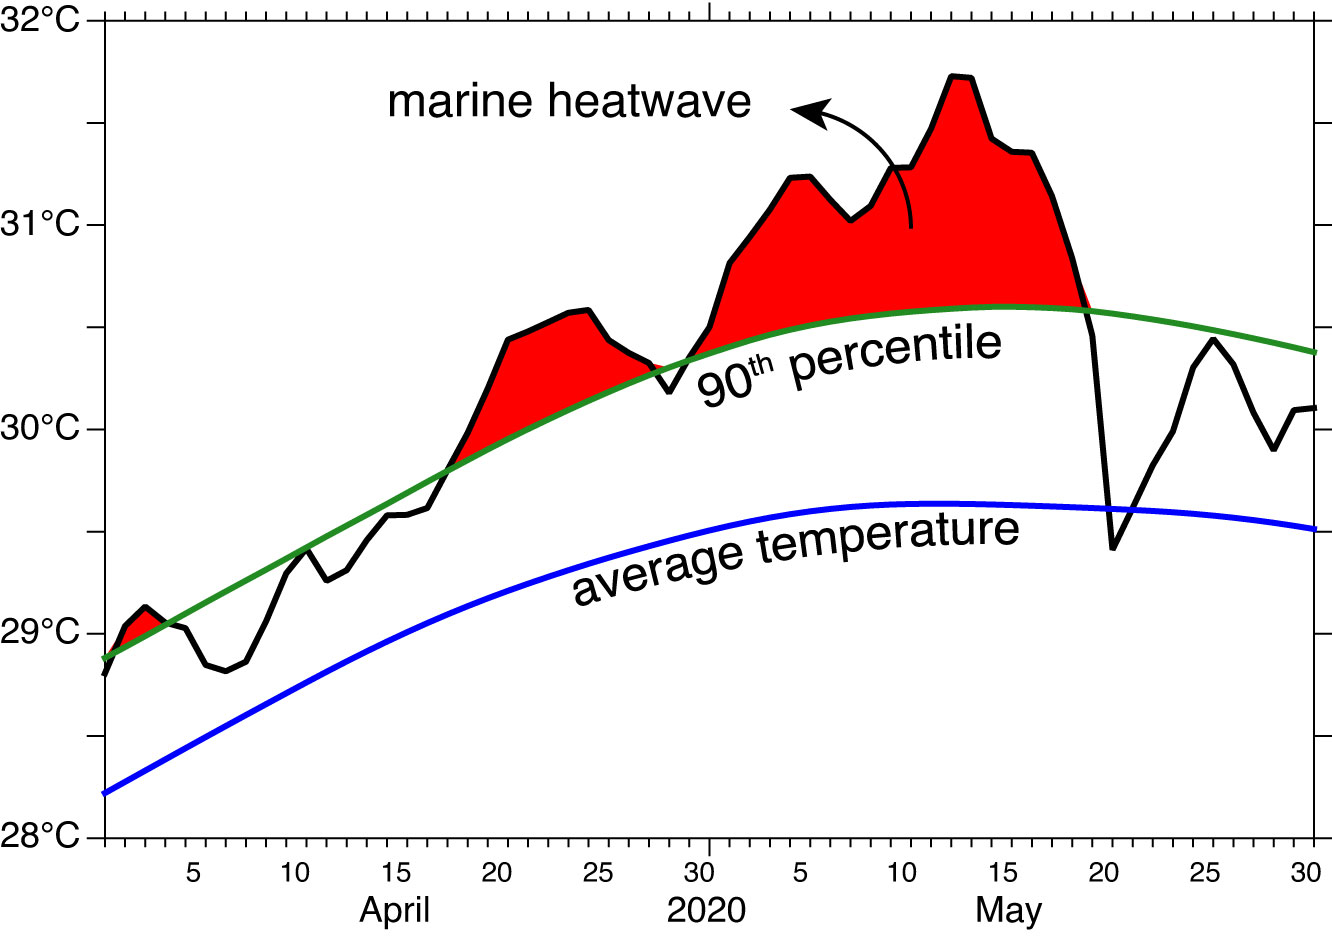

In [20]:
import numpy as np
import pandas as pd
import xarray as xr
import netCDF4 as nc

In [32]:
dataset = xr.open_dataset("sst.day.mean.2021.nc", engine="netcdf4")

In [33]:
dataset

<xarray.Dataset>
Dimensions:  (time: 365, lat: 720, lon: 1440)
Coordinates:
  * time     (time) datetime64[ns] 2021-01-01 2021-01-02 ... 2021-12-31
  * lat      (lat) float32 -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float32 0.125 0.375 0.625 0.875 ... 359.1 359.4 359.6 359.9
Data variables:
    sst      (time, lat, lon) float32 ...
Attributes:
    Conventions:    CF-1.5
    title:          NOAA/NCEI 1/4 Degree Daily Optimum Interpolation Sea Surf...
    institution:    NOAA/National Centers for Environmental Information
    source:         NOAA/NCEI https://www.ncei.noaa.gov/data/sea-surface-temp...
    References:     https://www.psl.noaa.gov/data/gridded/data.noaa.oisst.v2....
    dataset_title:  NOAA Daily Optimum Interpolation Sea Surface Temperature
    version:        Version 2.1
    comment:        Reynolds, et al.(2007) Daily High-Resolution-Blended Anal...

In [34]:
print('Dimension:- ',dataset.dims)
print('\nCoordinates:- ',dataset.coords)
print('\nAttributes:- ',dataset.attrs)

Dimension:-  Frozen({'time': 365, 'lat': 720, 'lon': 1440})

Coordinates:-  Coordinates:
  * time     (time) datetime64[ns] 2021-01-01 2021-01-02 ... 2021-12-31
  * lat      (lat) float32 -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float32 0.125 0.375 0.625 0.875 ... 359.1 359.4 359.6 359.9

Attributes:-  {'Conventions': 'CF-1.5', 'title': 'NOAA/NCEI 1/4 Degree Daily Optimum Interpolation Sea Surface Temperature (OISST) Analysis, Version 2.1', 'institution': 'NOAA/National Centers for Environmental Information', 'source': 'NOAA/NCEI https://www.ncei.noaa.gov/data/sea-surface-temperature-optimum-interpolation/v2.1/access/avhrr/', 'References': 'https://www.psl.noaa.gov/data/gridded/data.noaa.oisst.v2.highres.html', 'dataset_title': 'NOAA Daily Optimum Interpolation Sea Surface Temperature', 'version': 'Version 2.1', 'comment': 'Reynolds, et al.(2007) Daily High-Resolution-Blended Analyses for Sea Surface Temperature (available at https://doi.org/10.1175/2007JCLI

In [35]:
# Here we have only one variable that is SST(Sea Surface Temp). We can extract the data by using the following command

sst=dataset.sst

In [36]:
#Storing Arrays
Time=dataset.sst.time.data        #1D
Latitude=dataset.sst.lat.data     #1D
Longitude=dataset.sst.lon.data    #1D
sea_surface_temp=dataset.sst.data #3D

In [37]:
sst.shape

(365, 720, 1440)

In [38]:
sst.isel(time=0)

<xarray.DataArray 'sst' (lat: 720, lon: 1440)>
array([[  nan,   nan,   nan, ...,   nan,   nan,   nan],
       [  nan,   nan,   nan, ...,   nan,   nan,   nan],
       [  nan,   nan,   nan, ...,   nan,   nan,   nan],
       ...,
       [-1.72, -1.74, -1.75, ..., -1.75, -1.74, -1.72],
       [-1.74, -1.77, -1.79, ..., -1.79, -1.78, -1.74],
       [-1.8 , -1.8 , -1.8 , ..., -1.8 , -1.8 , -1.8 ]], dtype=float32)
Coordinates:
    time     datetime64[ns] 2021-01-01
  * lat      (lat) float32 -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float32 0.125 0.375 0.625 0.875 ... 359.1 359.4 359.6 359.9
Attributes:
    long_name:     Daily Sea Surface Temperature
    units:         degC
    valid_range:   [-3. 45.]
    precision:     2.0
    dataset:       NOAA High-resolution Blended Analysis
    var_desc:      Sea Surface Temperature
    level_desc:    Surface
    statistic:     Mean
    parent_stat:   Individual Observations
    actual_range:  [-1.8  35.19]

In [39]:
## Lets slice the data which we are taking under consideration i.e Indian Ocean

Indian_Ocean=sst.sel(lon=slice(60,100),lat=slice(0,25))

In [40]:
#Storing Arrays as per the data we are dealing with
Time=dataset.sst.sel(lon=slice(60,100),lat=slice(0,25)).time.data        #1D
Latitude=dataset.sst.sel(lon=slice(60,100),lat=slice(0,25)).lat.data     #1D
Longitude=dataset.sst.sel(lon=slice(60,100),lat=slice(0,25)).lon.data    #1D
sea_surface_temp=dataset.sst.sel(lon=slice(60,100),lat=slice(0,25)).data #3D

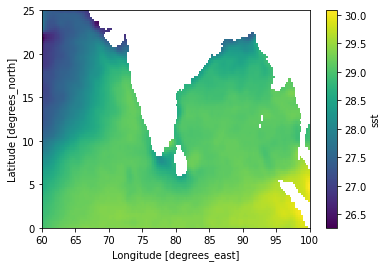

In [41]:
## lets plot the data 
Indian_Ocean.mean(dim='time').plot()

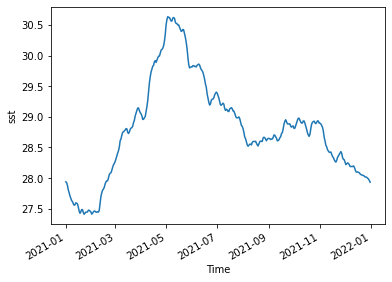

In [42]:
Indian_Ocean.mean(dim=('lat','lon')).plot()

In [43]:
## Mean during Monsoon
IO_Monsoon=Indian_Ocean.sel(time=slice('2021-06-01','2021-09-30')).mean(dim='time')

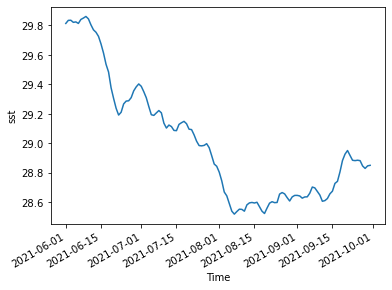

 One thing which we can observe here is during monsoon SST is continously decreasing and by the end it started to accelate 

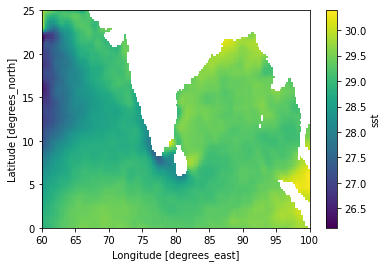

In [45]:
IO_Monsoon.plot()

## Detecting Marine Heatwaves

In [ ]:
## First Approach

In [61]:
df=pd.DataFrame(np.array(Indian_Ocean[0,:,:]),index=Latitude,columns=Longitude)

In [69]:
np.percentile(np.array(df.fillna(0)), 90)

29.320999717712407

In [71]:
def give_percentile(df):
    Average=np.percentile(np.array(df.fillna(0)), 50)
    Nintey_percentile=np.percentile(np.array(df.fillna(0)), 90)
    
    return Average,Nintey_percentile
    

In [72]:
give_percentile(pd.DataFrame(np.array(Indian_Ocean[0,:,:]),index=Latitude,columns=Longitude))

(27.69999885559082, 29.320999717712407)

In [73]:
Average=[]
Nintey_percentile=[]
for i in range(len(Time)):
    
    Average1,Nintey_percentile1=give_percentile(pd.DataFrame(np.array(Indian_Ocean[i,:,:]),index=Latitude,columns=Longitude))
    Average.append(Average1)
    Nintey_percentile.append(Nintey_percentile1)
    
    

In [82]:
Average=np.array(Average)
Nintey_percentile=np.array(Nintey_percentile)

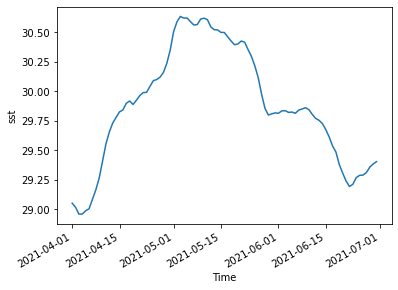

In [87]:
## lets plot a curve
Indian_Ocean.sel(time=slice('2021-04-01','2021-06-30')).mean(dim=('lat','lon')).plot()

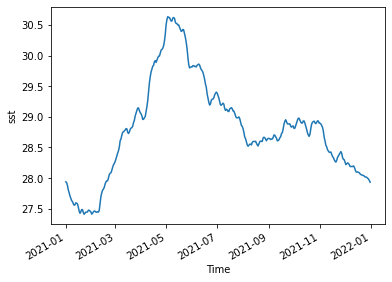

In [119]:
Indian_Ocean.mean(dim=('lat','lon')).plot()

In [103]:
df2=pd.DataFrame(np.array(Indian_Ocean.mean(dim=('lat','lon'))),index=Time,columns=['sst'])

In [110]:
df3=pd.DataFrame(Nintey_percentile,index=Time,columns=['Nintey_percentile'])
df4=pd.DataFrame(Average,index=Time,columns=['Average'])

In [114]:
df_plot=pd.concat([df2,df3,df4],axis=1)

In [115]:
df_plot

,sst,Nintey_percentile,Average
2021-01-01,27.939629,29.321000,27.699999
2021-01-02,27.925890,29.359999,27.680000
2021-01-03,27.877935,29.330000,27.699999
2021-01-04,27.806465,29.269999,27.660000
2021-01-05,27.761566,29.220999,27.619999
...,...,...,...
2021-12-27,28.010624,29.000000,27.930000
2021-12-28,27.998402,28.969999,27.900000
2021-12-29,27.983971,28.959999,27.889999
2021-12-30,27.961340,28.939999,27.859999


<AxesSubplot:>

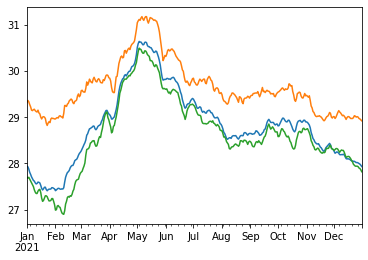

In [118]:
df_plot['sst'].plot()

df_plot['Nintey_percentile'].plot()

df_plot['Average'].plot()



Failed! as I couldnot detect marine heatwave
1. orange line ==> 90 percentile
2. blue line ==>  sst
3. green line ==> 50 percentile


In [121]:
## Second Approach
## Detecting marine heatwave events with xmhw
import numpy as np
import pandas as pd
import xarray as xr
import dask
from xmhw.xmhw import threshold, detect

In [122]:
# open file, read sst and calculate climatologies
ds =xr.open_dataset('sst.day.mean.2021.nc',chunks={'time':60})

In [123]:
# open file, read sst and calculate climatologies

sst = ds['sst']


In [124]:
sst

<xarray.DataArray 'sst' (time: 365, lat: 720, lon: 1440)>
dask.array<open_dataset-aa397fc4b716cd7f31199b32ad2fdf6bsst, shape=(365, 720, 1440), dtype=float32, chunksize=(60, 720, 1440), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2021-01-01 2021-01-02 ... 2021-12-31
  * lat      (lat) float32 -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float32 0.125 0.375 0.625 0.875 ... 359.1 359.4 359.6 359.9
Attributes:
    long_name:     Daily Sea Surface Temperature
    units:         degC
    valid_range:   [-3. 45.]
    precision:     2.0
    dataset:       NOAA High-resolution Blended Analysis
    var_desc:      Sea Surface Temperature
    level_desc:    Surface
    statistic:     Mean
    parent_stat:   Individual Observations
    actual_range:  [-1.8  35.19]

In [ ]:
clim = threshold(sst)
clim

C:\Users\matin\anaconda3\lib\site-packages\xarray\core\indexing.py:1227: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]


calendar not in keys


This approach was based on a code already available @https://github.com/coecms/xmhw/blob/master/docs/xmhw_demo.ipynb but I am getting this error which so far I am unable to rectify.